<a href="https://colab.research.google.com/github/jessy235/Simulacion-II/blob/main/MCMC_Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerías necesarias


In [1]:
# En este notebook implementaremos el algoritmo de Metropolis-Hastings
# para generar una muestra que siga la distribución f(x1, x2)
# que aparece en la figura del problema.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Definimos la función objetivo f(x1, x2)

In [2]:
# No incluimos la constante c, porque en el algoritmo
# sólo necesitamos proporciones entre f(x') y f(x).

def f(x1, x2):
    """
    Función objetivo no normalizada:
    f(x1, x2) = exp(-0.5 * (x1^2*x2^2 + x1^2 + x2^2 - 8x1 - 8x2))
    """
    return np.exp(-0.5 * (x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2))

Implementación del algoritmo Metropolis-Hastings:


In [3]:
# El algoritmo genera una "cadena" de puntos que siguen
# aproximadamente la distribución f(x1, x2).

def metropolis_hastings(f, num_samples=5000, sigma=1.0):
    """
    Implementa el algoritmo de Metropolis-Hastings.

    Parámetros:
      f : función objetivo
      num_samples : número total de muestras
      sigma : desviación estándar de la propuesta (N(0, sigma))

    Retorna:
      samples : arreglo con todas las muestras generadas
    """
    samples = np.zeros((num_samples, 2))   # almacenará las muestras
    x_current = np.array([0.0, 0.0])       # punto inicial (puede ser cualquiera)

    for i in range(1, num_samples):
        # 1. Proponer un nuevo punto cercano al actual
        x_proposal = x_current + np.random.normal(0, sigma, 2)

        # 2. Calcular la razón de aceptación r = f(x') / f(x)
        r = f(x_proposal[0], x_proposal[1]) / f(x_current[0], x_current[1])

        # 3. Generar un número aleatorio u ~ Uniforme(0,1)
        u = np.random.rand()

        # 4. Aceptar el nuevo punto si u < r
        if u < r:
            x_current = x_proposal  # aceptamos el candidato

        # 5. Guardar el punto (ya sea nuevo o el mismo)
        samples[i] = x_current

    return samples

Ejecutamos el muestreo:

In [4]:
np.random.seed(0)  # para reproducibilidad
samples = metropolis_hastings(f, num_samples=10000, sigma=0.5)

print("Muestreo completado. Total de muestras generadas:", len(samples))

Muestreo completado. Total de muestras generadas: 10000


Visualización de la trayectoria:

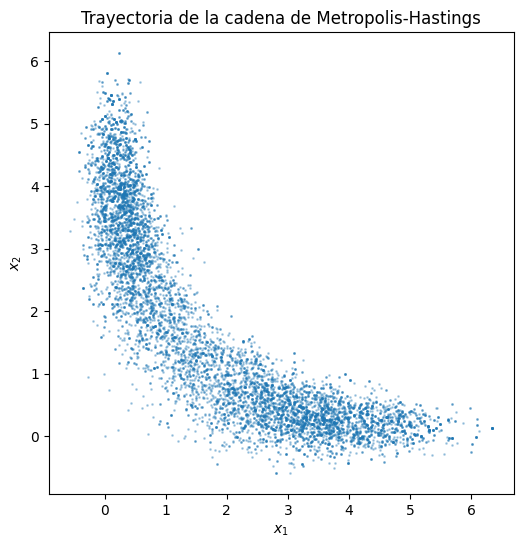

In [5]:
# Esto nos muestra cómo se mueve la cadena por el espacio de (x1, x2)

plt.figure(figsize=(6,6))
plt.plot(samples[:,0], samples[:,1], '.', alpha=0.3, markersize=2)
plt.title("Trayectoria de la cadena de Metropolis-Hastings")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Histograma 2D de la muestra:

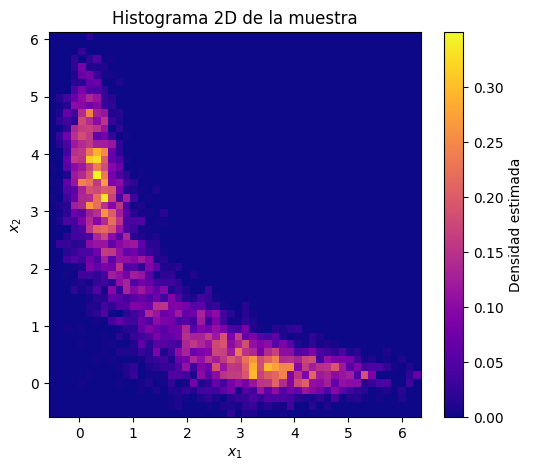

In [6]:
# El histograma muestra la densidad estimada según las muestras
# Debería parecerse a la forma de la función f(x1, x2)

plt.figure(figsize=(6,5))
plt.hist2d(samples[:,0], samples[:,1], bins=50, density=True, cmap='plasma')
plt.colorbar(label='Densidad estimada')
plt.title("Histograma 2D de la muestra")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Gráfica 3D de la función objetivo f(x1, x2):

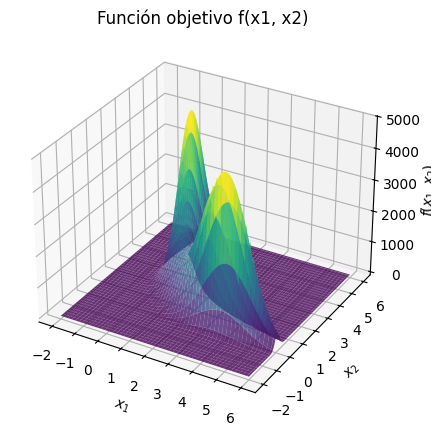

In [7]:
# Esta es la forma real de la función que queremos muestrear.

x1 = np.linspace(-2, 6, 100)
x2 = np.linspace(-2, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_title("Función objetivo f(x1, x2)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")
plt.show()

Calcular la tasa de aceptación:

In [8]:
# Medimos qué porcentaje de propuestas fueron aceptadas.
# Un valor entre 25% y 50% suele ser bueno.

accepted = np.sum(np.any(np.diff(samples, axis=0) != 0, axis=1))
accept_rate = accepted / len(samples)
print("Tasa de aceptación:", round(accept_rate*100, 2), "%")

Tasa de aceptación: 53.59 %


 Estimación del punto donde f(x1, x2) es máximo:

In [9]:

f_values = np.array([f(x[0], x[1]) for x in samples])
best_point = samples[np.argmax(f_values)]
print("Punto de máximo estimado:", best_point)

Punto de máximo estimado: [0.26359066 3.72161819]


El algoritmo Metropolis–Hastings **funciona porque acepta nuevos valores de forma proporcional a la densidad objetivo**, generando una secuencia de puntos que siguen la misma distribución.  
Esto nos permite **muestrear y analizar funciones complejas** sin calcular integrales complicadas ni constantes de normalización.